In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset_dir = 'D:/Recycling_Keras/dataset/split_data/'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [3]:
image_width = 200
image_height = 200

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 17443 images belonging to 6 classes.
Found 2177 images belonging to 6 classes.
Found 2186 images belonging to 6 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    break

In [6]:
labels_list = train_generator.class_indices
labels_list

{'battery': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [7]:
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'battery', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

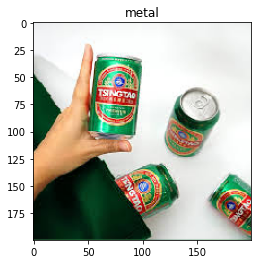

In [8]:
image = data_batch[0]

plt.imshow(image)
plt.title(labels_list[np.argmax(labels_batch[0])])
plt.show()

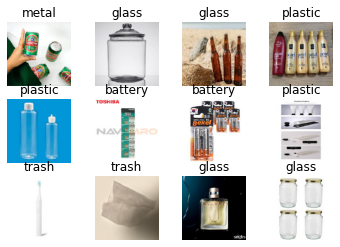

In [9]:
rows = 3
columns = 4

for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(image_width, image_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=17443 / 32,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=2177 / 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
 51/545 [=>............................] - ETA: 4:27 - loss: 2.1001 - accuracy: 0.2708

In [ ]:
loss = history.history['loss']         
val_loss = history.history['val_loss'] 

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
acc = history.history['accuracy']           
val_acc = history.history['val_accuracy']   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model.save('./model/plus_battery.h5')

In [ ]:
from keras.applications import inception_resnet_v2
pretrained = inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(200, 200, 3))
pretrained.summary()

In [ ]:
model_sec = models.Sequential()
model_sec.add(pretrained)

model_sec.add(layers.Flatten())
model_sec.add(layers.Dropout(0.5))
model_sec.add(layers.Dense(6, activation = 'softmax'))

In [ ]:
model_sec.compile(optimizer=optimizers.Adam(lr = 0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    

In [ ]:
history = model_sec.fit_generator(train_generator,
                              steps_per_epoch=17443 / 32,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=2177 / 32)

In [ ]:
model.save('./model/imagenet_model.h5')